In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [14]:
file1 = "c_train.xlsx"
file2 = "n_train.xlsx"
df1 = pd.read_excel(file1)
df2 = pd.read_excel(file2)

In [15]:
ratio = list()
for row in range(df1.shape[0]):
    row_ratio = list()
    for col in range(4,df1.shape[1]):
        row_ratio.append(df1.iloc[row,col]/df2.iloc[row,col])
    ratio.append(row_ratio)
ratio = np.array(ratio)

In [16]:
mean = [np.mean(l) for l in ratio]
std = [np.std(l) for l in ratio]
up = [mean[i]+2.2622*(std[i]/math.sqrt(10)) for i in range(len(mean))]
low = [mean[i]-2.2622*(std[i]/math.sqrt(10)) for i in range(len(mean))]

In [17]:
def plot_mean_and_CI(x, mean, low, up, color_mean = None, color_shading=None):
    plt.plot(x, mean, color = color_mean)
    plt.fill_between(x, low, up, color=color_shading, alpha=.5)

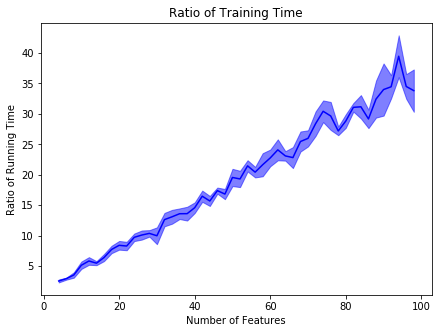

In [19]:
x = [2*(i+2) for i in range(48)]
fig = plt.figure(1, figsize=(7, 5))
plot_mean_and_CI(x, mean, low, up, color_mean = 'blue', color_shading='blue')
plt.xlabel("Number of Features")
plt.ylabel("Ratio of Running Time")
plt.title("Ratio of Training Time")
fig.savefig('training.png', bbox_inches='tight', dpi = 800)